# Translating droplet verification case


![title](translating-droplet-figures/translating-droplet-3D-standalone-1.png)

A droplet is translated in a rectangular domain using a spatially constant internal and inlet velocity field. 

## Tests 

### 1 Translating droplet with varying density ratios without viscosity and surface tension 

#### Goal: Ensure the advection of the interface is consistent with the advection of the momentum

$\nabla \cdot(\rho \mathbf{v} \mathbf{v})$. To ensure this, the density in the new time step $\rho^{n+1}$ must be updated using the same flux $\rho_f^k \mathbf{v}_f^k \cdot \mathbf{S}_f$ that is used in the convective term of the momentum equation. See literature on multiphase momentum transport for varying density ratios. For this test case, viscosity and surface tension are set to $0$. 

In  other words, there should be no change in the mixture velocity if the mass flux in the momentum equation is also used to update the mixture density and of course the pressure stays the same $p=0$. 

### 2 Translating droplet with varying density ratios 

#### Ensure the forces are balanced on the interface for an interface that moves in the simplest way - by translation

This is tested in the case where kinematic viscosity is $\nu \ne 0$ and the surface tension force $\mathbf{f}_\sigma \ne \mathbf{0}$.

# 1 Translating droplet with varying density ratios without viscosity and surface tension 

In [45]:
import dataframeWithMetadata as dfmd
sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
if (not(os.path.exists('figures'))):
    os.mkdir('figures')
    
def plot_density_ratio_dframe(dframe):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""

    for resolution in [16, 32]:
        for density_ratio in [1, 1000, 10000]:
            inter_iso_foam_df_subset = inter_iso_foam_df.loc[resolution,density_ratio,:]
            plt.plot(inter_iso_foam_df_subset["time"], inter_iso_foam_df_subset["Linf velocity error"], 
                     label="RESOLUTION:%s, DENSITY-RATIO:%s" % (resolution, density_ratio))
    plt.legend()

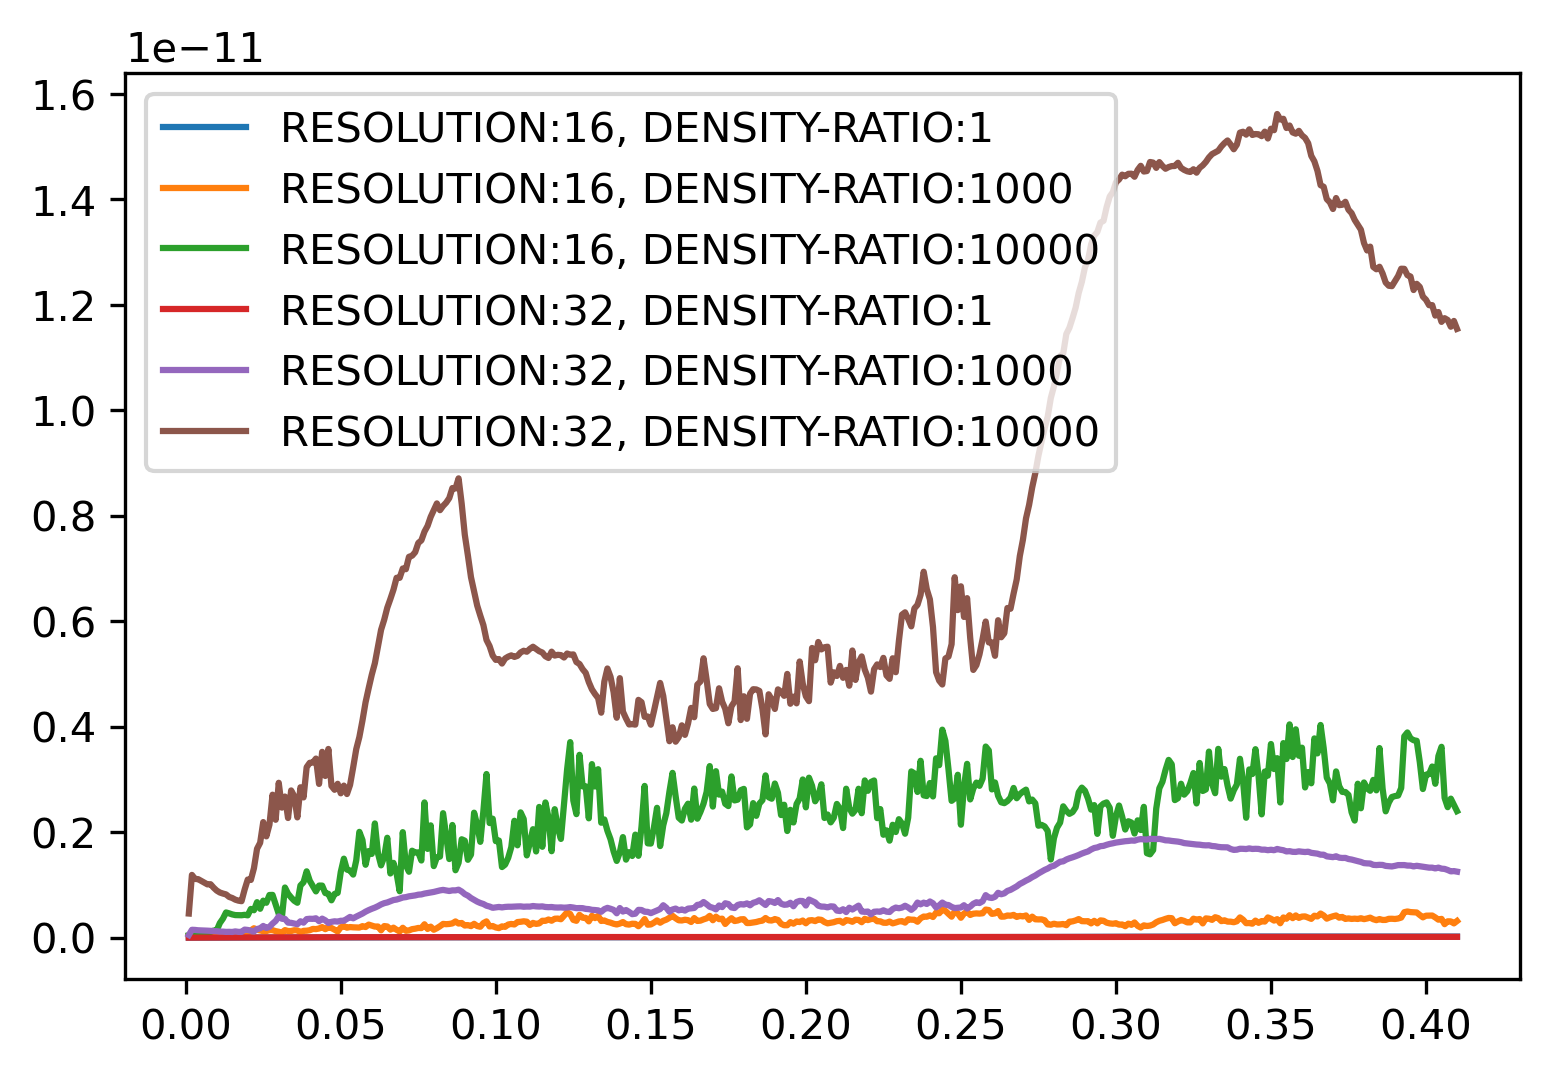

In [46]:
interisofoam_dfmd = dfmd.metadated_dataframe_reader("interIsoFoam-densityRatioInfluence.csv")
interisofoam_df = interisofoam_dfmd.read_dataframe()
plot_density_ratio_dframe(interisofoam_df)

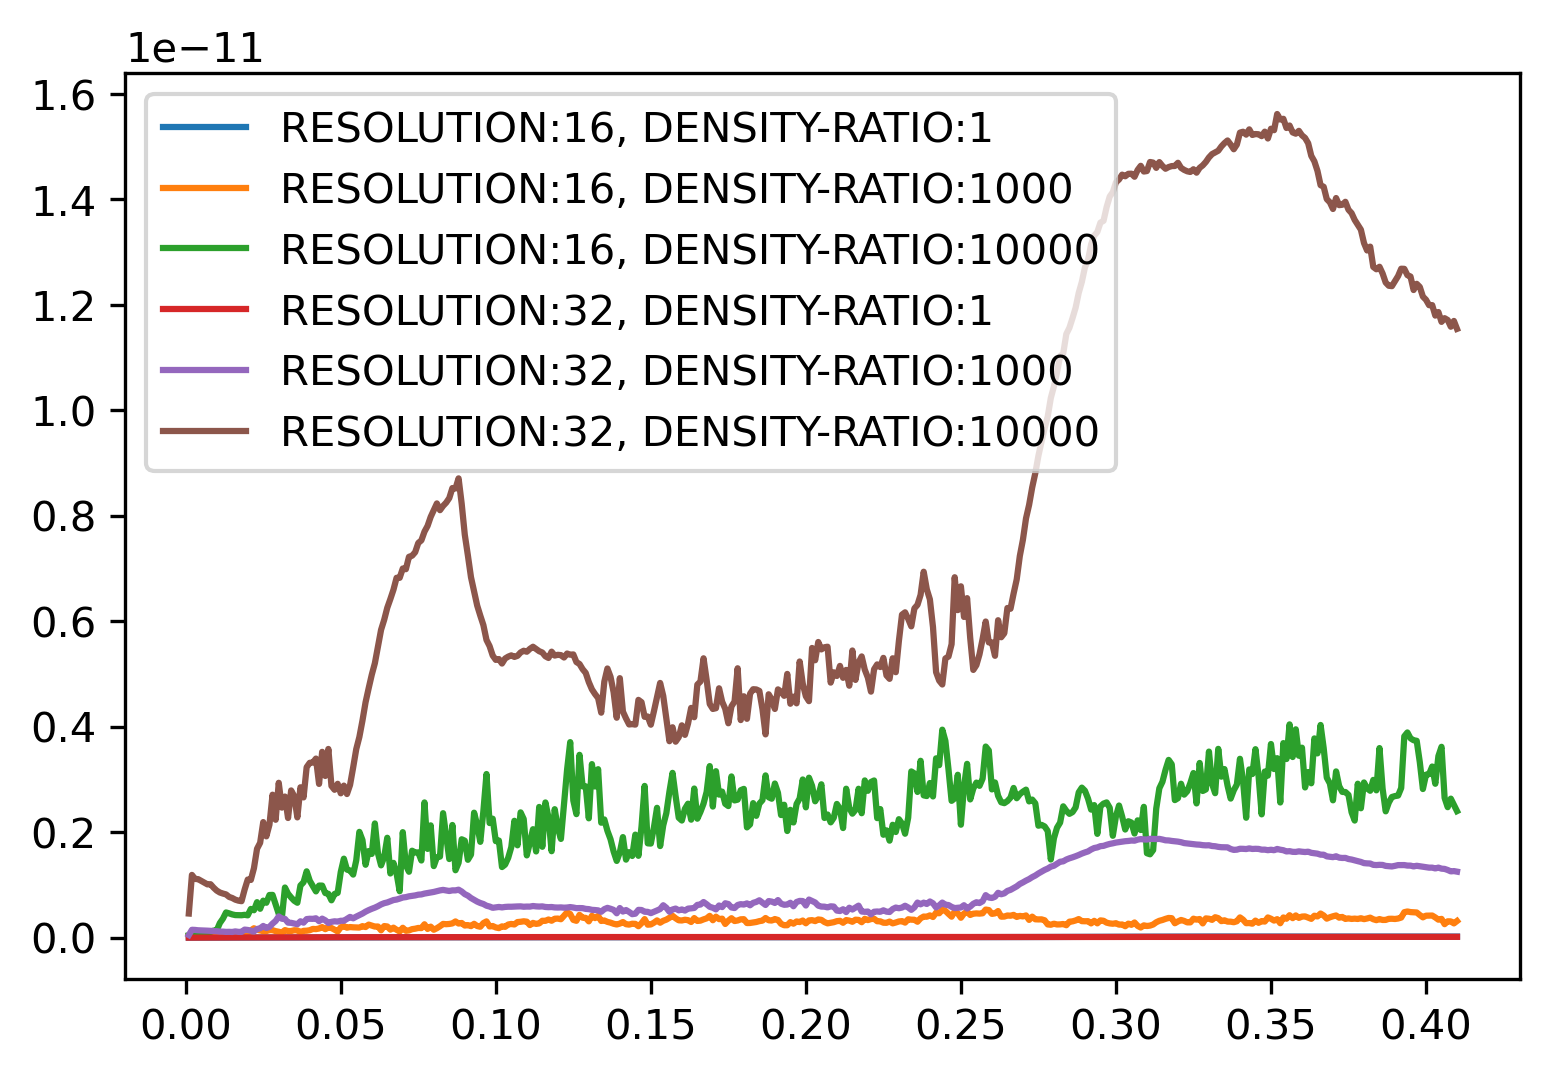

In [47]:
interisorhofoam_dfmd = dfmd.metadated_dataframe_reader("interIsoRhoFoam-densityRatioInfluence.csv")
interisorhofoam_df = interisorhofoam_dfmd.read_dataframe()
plot_density_ratio_dframe(interisorhofoam_df)